In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings

warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\30393\Desktop\data.xlsx"
df = pd.read_excel(file_path, sheet_name='Apr_TF')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
means = scaler.mean_
stds = scaler.scale_


stats_df = pd.DataFrame({
    'Column': numerical_columns,
    'Mean': means,
    'Std': stds
})


print(stats_df)

output_file_path = r"C:\Users\30393\Desktop\Apr_TF_scaler.xlsx"
df.to_excel(output_file_path, index=False)

      Column        Mean        Std
0       Year    2.026178   0.858798
1          R  124.290576  12.745110
2          G  135.102094   9.113525
3          B   26.149215   5.350538
4         NR    0.434325   0.019701
5         NG    0.473085   0.005396
6         NB    0.092590   0.022879
7         GB    5.418056   1.273419
8         RB    5.015578   1.341765
9         GR    1.091240   0.045241
10        BI  107.157503   8.375270
11       BIM   13.789944   0.445754
12       SCI   -0.043185   0.020590
13       GLI    0.284573   0.009943
14        HI    0.789628   0.108668
15     NGRDI    0.043185   0.020590
16     NDGBI    0.674962   0.068631
17     NDRBI    0.649111   0.084106
18         I  285.541885  18.468689
19         S    0.722229   0.068637
20      VARI    0.038760   0.017636
21       HUE   -1.555064   0.112942
22      HUE2   -1.566806   0.000653
23       BGI    0.196110   0.050137
24         L   95.180628   6.156230
25      GRAY  119.448822   8.702708
26      GLAI    2.471089   0

In [7]:
df = pd.read_excel("C:\\Users\\30393\Desktop\\Apr_TF_scaler.xlsx")
from sklearn.model_selection import train_test_split

X = df.drop(['Year', 'Number', 'TF(mg/g)'], axis=1)
y = df['TF(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)  


feature_importance_df = pd.DataFrame({                
'Feature': X.columns,                
'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_sixteen_features_df = feature_importance_df.head(16)

print(top_sixteen_features_df)

Feature Importance: [0.11074061 0.01543005 0.00608098 0.00950305 0.01808485 0.00501312
 0.00489502 0.00135737 0.00939719 0.02968424 0.07875211 0.00903191
 0.01672929 0.01024388 0.01108511 0.00446578 0.00273958 0.07000371
 0.00392531 0.01765121 0.03838044 0.02156757 0.00704294 0.03796396
 0.0250999  0.05601107 0.00114792 0.0023184  0.00752037 0.00258121
 0.00655432 0.01059514 0.20520527 0.01674683 0.03164623 0.0124809
 0.06759229 0.0079854  0.00674546]
   Feature  Importance
32   RminG    0.205205
0        R    0.110741
10     BIM    0.078752
17       I    0.070004
36      a*    0.067592
25    GLAI    0.056011
20     HUE    0.038380
23       L    0.037964
34  BplusG    0.031646
9       BI    0.029684
24    GRAY    0.025100
21    HUE2    0.021568
4       NG    0.018085
19    VARI    0.017651
33   GminB    0.016747
12     GLI    0.016729


In [9]:
output_file = 'top_sixteen_features_Apr_TF.xlsx'

try:
    
    top_sixteen_features_df.to_excel(output_file, index=False)
    print(f"\nThe first 16 important features have been successfully saved {output_file}")
    
except Exception as e:
    
    print(f"\nSave Failed: {e}")


The first 16 important features have been successfully saved top_sixteen_features_Apr_TF.xlsx


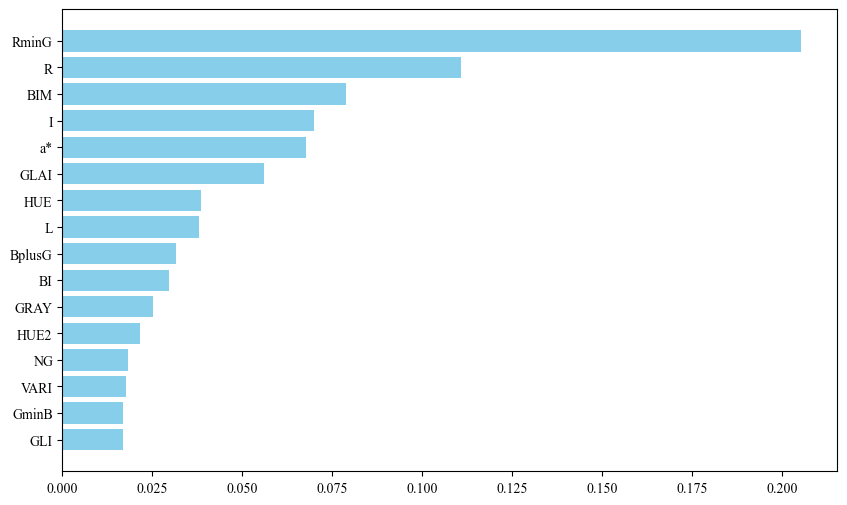

In [10]:
import os
plt.figure(figsize=(10, 6))
plt.barh(top_sixteen_features_df['Feature'], top_sixteen_features_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.savefig('Apr_TF_a.jpg', dpi=600, bbox_inches='tight')
plt.show()

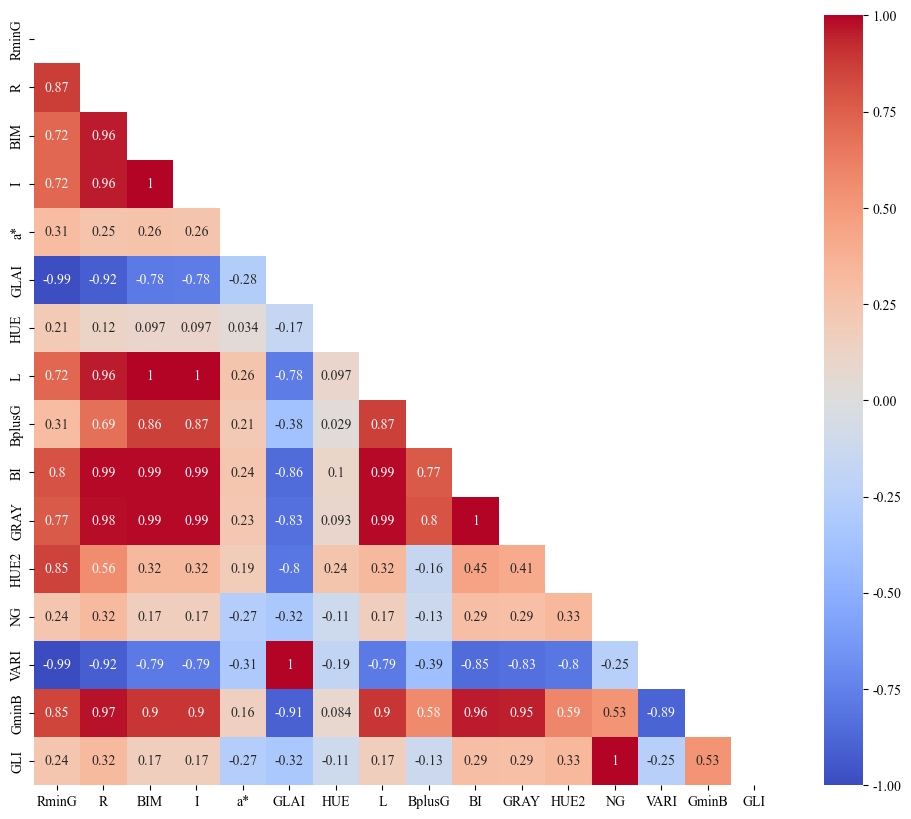

In [11]:
import seaborn as sns

correlation_matrix = X.corr(method='pearson')
top_sixteen_features = top_sixteen_features_df['Feature']



final_corr_matrix = correlation_matrix.loc[top_sixteen_features, top_sixteen_features]



plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

plt.savefig('Apr_TF_b.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [12]:
import pandas as pd

def select_top_features_by_correlation(corr_matrix, features, feature_importance_df, threshold=0.95):
    
    high_corr_pairs = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    features_to_remove = set()

    for pair in high_corr_pairs:
        importance_1 = feature_importance_df[feature_importance_df['Feature'] == pair[0]]['Importance'].values[0]
        importance_2 = feature_importance_df[feature_importance_df['Feature'] == pair[1]]['Importance'].values[0]

        if importance_1 < importance_2:
            features_to_remove.add(pair[0])
        else:
            features_to_remove.add(pair[1])

    filtered_features = [feature for feature in features if feature not in features_to_remove]
    return filtered_features

sorted_features = list(top_sixteen_features_df['Feature'][:16])

final_features = select_top_features_by_correlation(correlation_matrix, sorted_features, top_sixteen_features_df, threshold=0.95)
print(final_features)

['RminG', 'R', 'a*', 'HUE', 'BplusG', 'HUE2', 'NG']


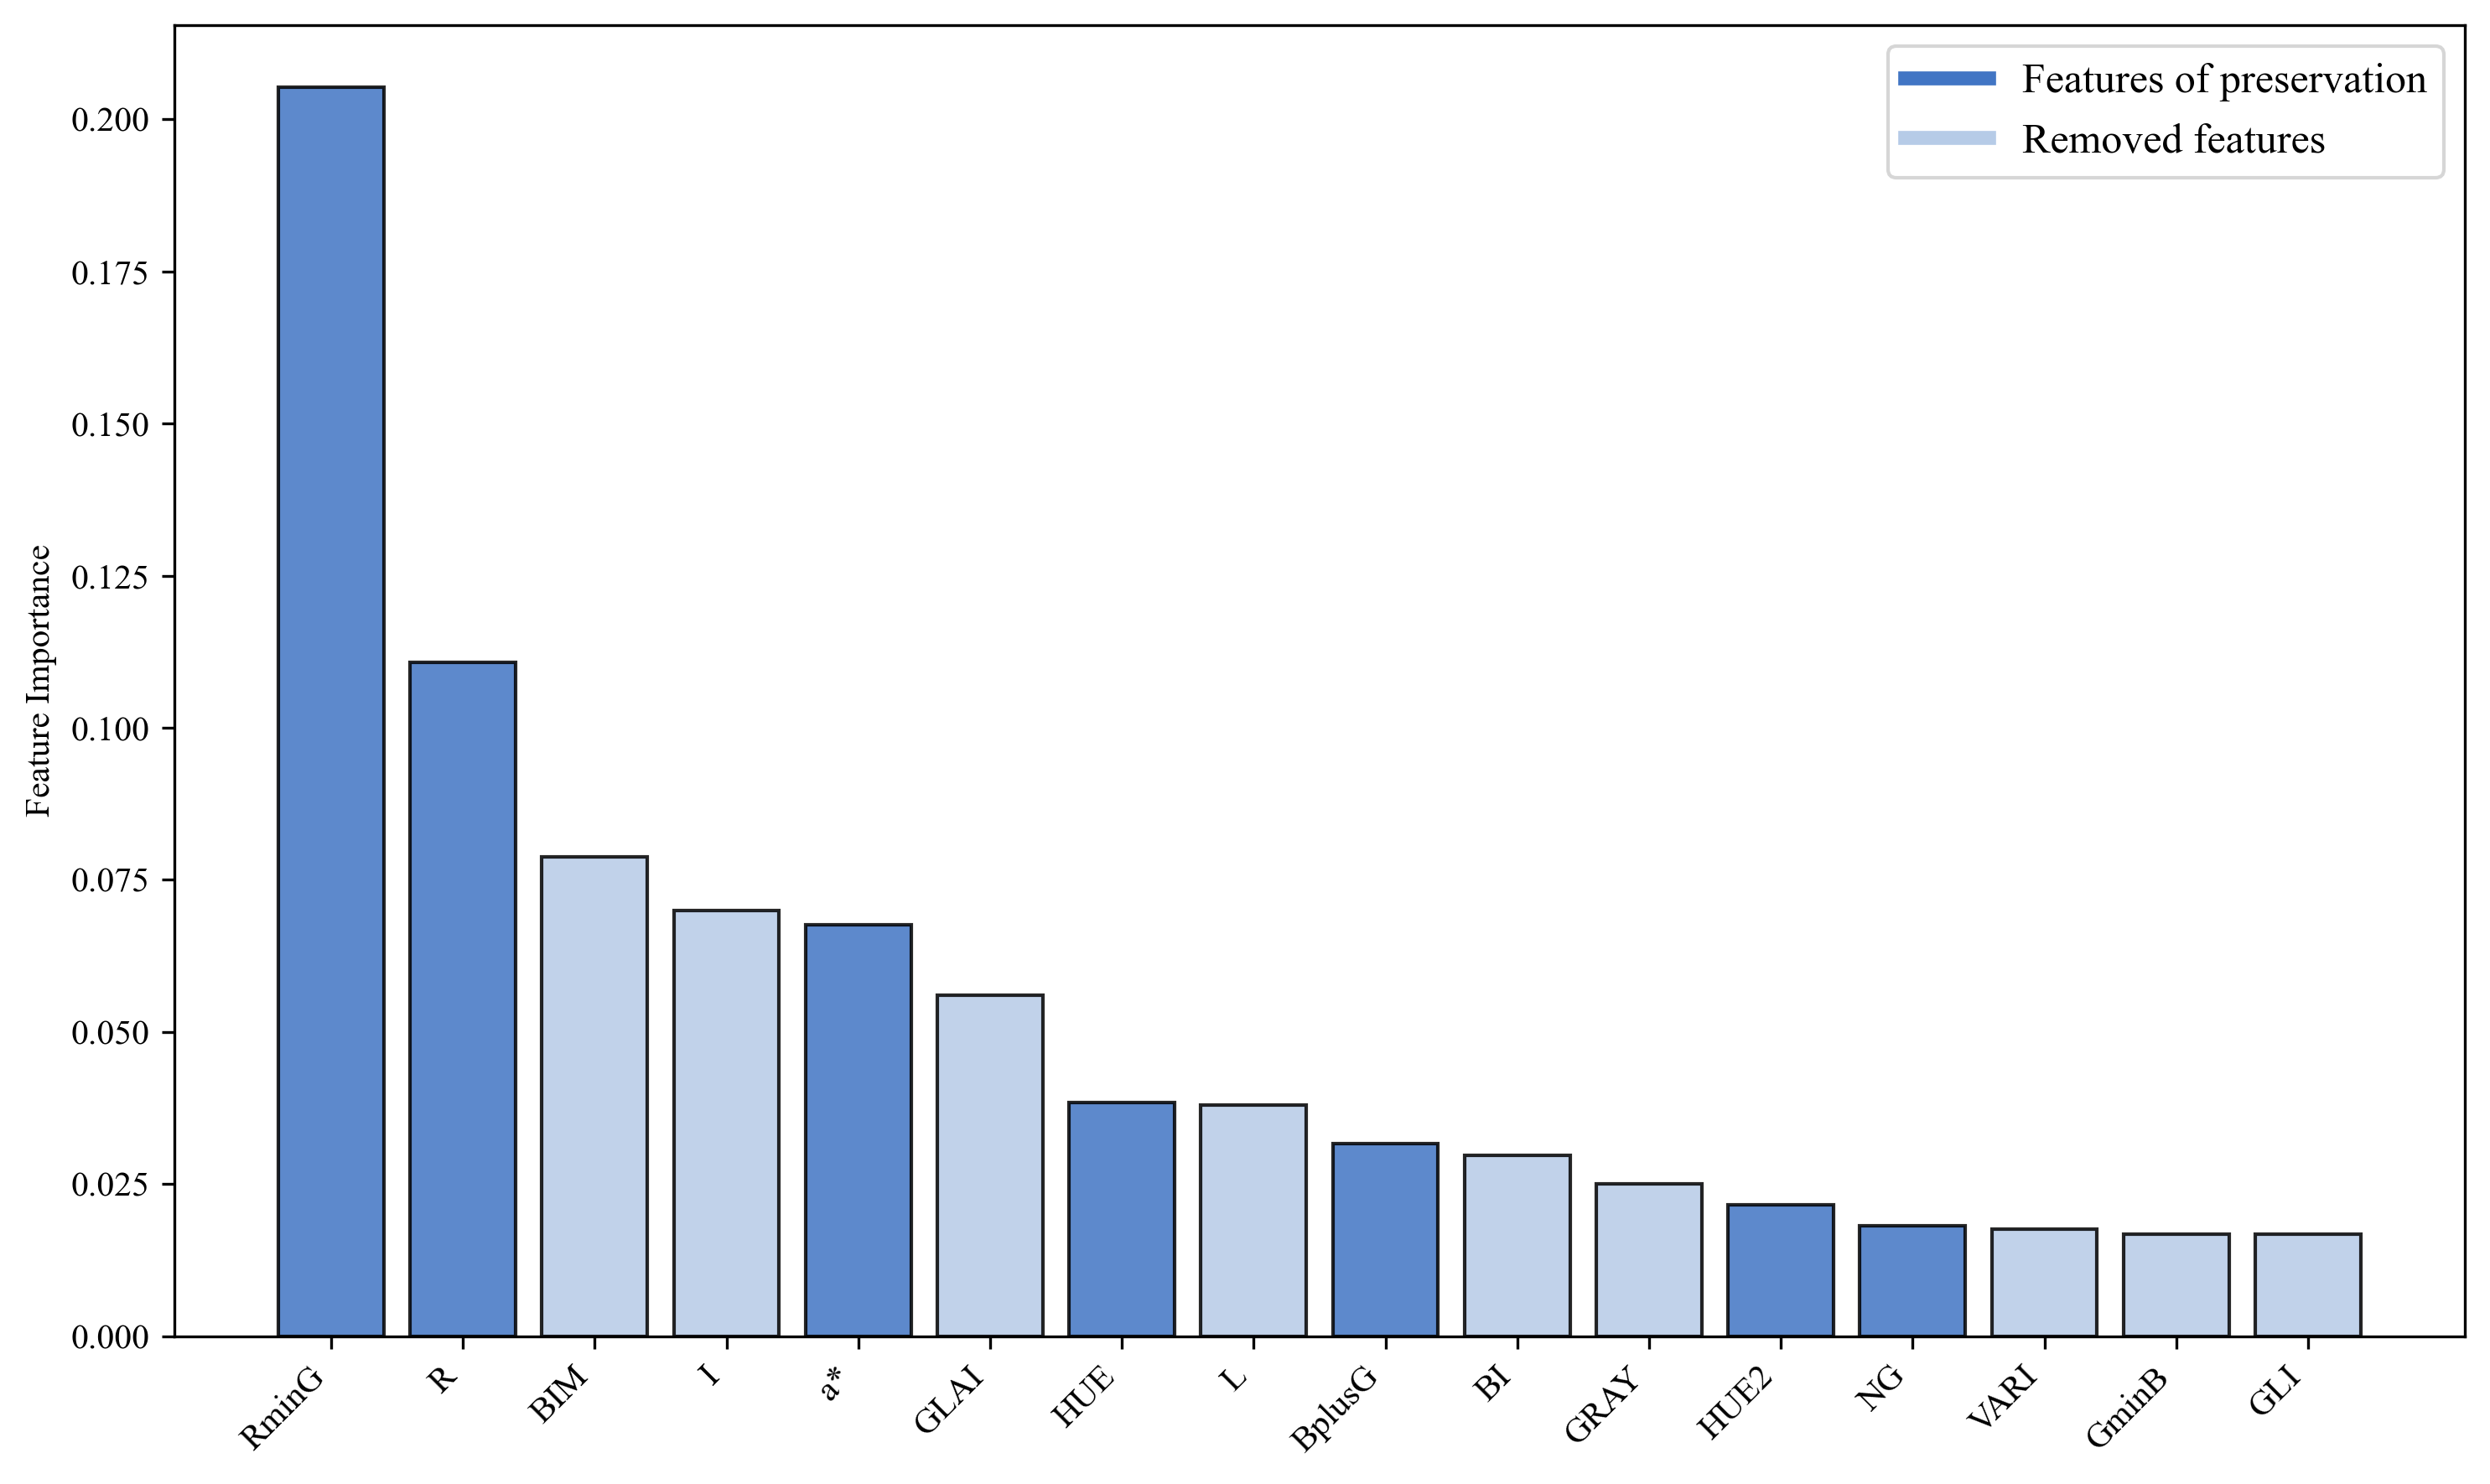

In [13]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, TextArea
import pandas as pd

feature_names = top_sixteen_features_df['Feature'].tolist()
feature_importances = feature_importance_df.iloc[0:16]['Importance']
selected_features = final_features

colors = [(65 / 255, 117 / 255, 196 / 255) if feature in selected_features else (182 / 255, 203 / 255, 231 / 255) 
          for feature in feature_names]

plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(feature_names, feature_importances, color=colors, edgecolor='black', alpha=0.85)

red_patch = plt.Line2D([0], [0], color=(65 / 255, 117 / 255, 196 / 255), lw=4, label='Features of preservation')  
blue_patch = plt.Line2D([0], [0], color=(182 / 255, 203 / 255, 231 / 255), lw=4, label='Removed features')  
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

plt.ylabel('Feature Importance', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('Apr_TF_c.jpg', dpi=600)
plt.show()

In [ ]:
#RF




In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    rf_model = RandomForestRegressor(random_state=42)
    
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                            Features  Num_Features  CV Mean R^2
0           [R, a*, HUE, BplusG, NG]             5     0.808649
1    [RminG, R, a*, HUE, BplusG, NG]             6     0.807753
2         [R, a*, HUE, BplusG, HUE2]             5     0.807042
3         [RminG, R, a*, BplusG, NG]             5     0.805158
4             [RminG, R, a*, BplusG]             4     0.804697
..                               ...           ...          ...
122                         [a*, NG]             2     0.265478
123                     [a*, BplusG]             2     0.087376
124                         [BplusG]             1     0.069306
125                             [a*]             1    -0.104809
126                             [NG]             1    -0.209921

[127 rows x 3 columns]


best_combination is: ['R', 'a*', 'HUE', 'BplusG', 'NG']


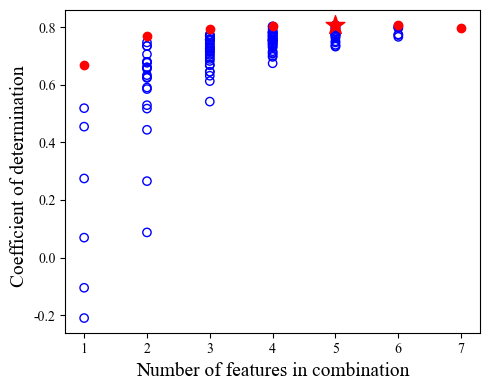

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TF_d.jpg', dpi=600)
plt.show()

In [ ]:
#svr




In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    svr_model = SVR(kernel='rbf')
    
    cv_scores = cross_val_score(
        estimator=svr_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                             Features  Num_Features  CV Mean R^2
0           [R, a*, BplusG, HUE2, NG]             5     0.812121
1          [RminG, R, a*, BplusG, NG]             5     0.811822
2    [RminG, R, a*, BplusG, HUE2, NG]             6     0.810427
3             [RminG, a*, BplusG, NG]             4     0.808259
4       [RminG, a*, BplusG, HUE2, NG]             5     0.806774
..                                ...           ...          ...
122                              [NG]             1     0.120468
123                         [a*, HUE]             2     0.117677
124                     [HUE, BplusG]             2     0.117260
125                              [a*]             1     0.085219
126                          [BplusG]             1     0.028592

[127 rows x 3 columns]


best_combination is: ['R', 'a*', 'BplusG', 'HUE2', 'NG']


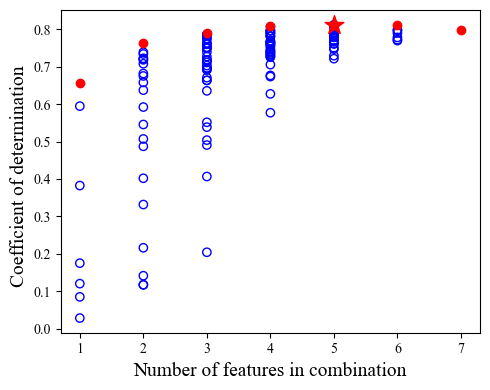

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TF_e.jpg', dpi=600)
plt.show()

In [ ]:
#mlp




In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        random_state=42,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.1
    )
    
    cv_scores = cross_val_score(
        estimator=mlp_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                    Features  Num_Features  CV Mean R^2
0              [R, a*, HUE2]             3     0.739878
1         [BplusG, HUE2, NG]             3     0.734826
2            [R, a*, BplusG]             3     0.734396
3            [R, BplusG, NG]             3     0.723659
4    [RminG, a*, BplusG, NG]             4     0.717994
..                       ...           ...          ...
122                [HUE, NG]             2    -0.417898
123        [HUE, BplusG, NG]             3    -0.595592
124            [a*, HUE, NG]             3    -0.649397
125            [HUE, BplusG]             2    -1.288727
126                [a*, HUE]             2    -3.746662

[127 rows x 3 columns]


best_combination is: ['R', 'a*', 'HUE2']


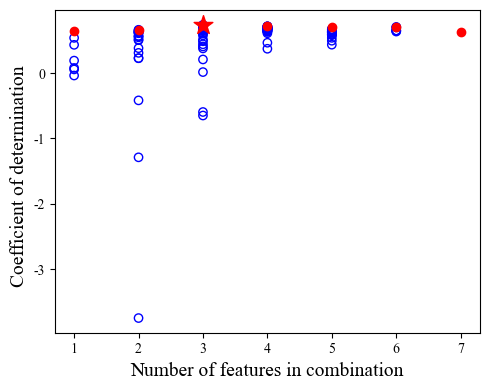

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TF_f.jpg', dpi=600)
plt.show()

In [ ]:
#xgb




In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=xgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                                  Features  Num_Features  CV Mean R^2
0         [RminG, R, a*, BplusG, HUE2, NG]             6     0.777265
1                   [RminG, R, a*, BplusG]             4     0.776673
2              [RminG, R, a*, HUE, BplusG]             5     0.765791
3             [RminG, R, a*, BplusG, HUE2]             5     0.762149
4    [RminG, R, a*, HUE, BplusG, HUE2, NG]             7     0.761855
..                                     ...           ...          ...
122                                 [HUE2]             1     0.051518
123                               [BplusG]             1     0.023851
124                           [a*, BplusG]             2    -0.248129
125                                   [a*]             1    -0.441175
126                                   [NG]             1    -0.446852

[127 rows x 3 columns]


best_combination is: ['RminG', 'R', 'a*', 'BplusG', 'HUE2', 'NG']


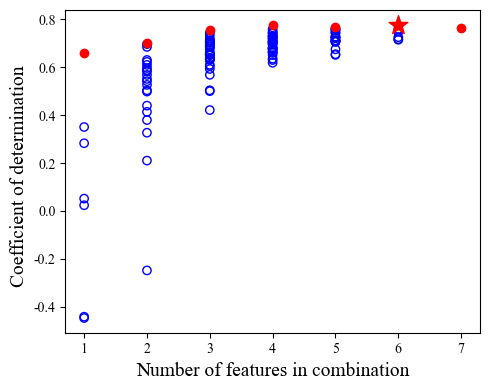

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TF_g.jpg', dpi=600)
plt.show()

In [ ]:
#lgb




In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=lgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                                  Features  Num_Features  CV Mean R^2
0    [RminG, R, a*, HUE, BplusG, HUE2, NG]             7     0.800533
1         [RminG, R, a*, BplusG, HUE2, NG]             6     0.798388
2               [RminG, R, a*, BplusG, NG]             5     0.796307
3                 [RminG, R, a*, HUE2, NG]             5     0.792584
4                [R, a*, BplusG, HUE2, NG]             5     0.792070
..                                     ...           ...          ...
122                               [a*, NG]             2     0.329046
123                           [a*, BplusG]             2     0.170683
124                                   [a*]             1     0.108980
125                                   [NG]             1     0.093641
126                               [BplusG]             1     0.091964

[127 rows x 3 columns]


best_combination is: ['RminG', 'R', 'a*', 'HUE', 'BplusG', 'HUE2', 'NG']


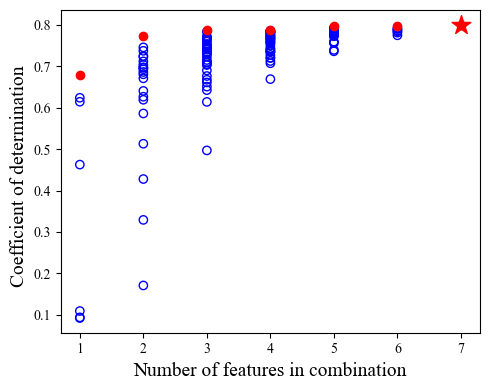

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TF_h.jpg', dpi=600)
plt.show()

In [25]:
#RF
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TF_scaler.xlsx")

selected_features = ['R', 'a*', 'HUE', 'BplusG', 'NG']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7922 0.6916 0.8293 0.817  0.9131], mean R² ± SD：0.8086 ± 0.0712
MAE ：[0.3235 0.4452 0.3122 0.3622 0.1938], mean MAE ± SD：0.3274 ± 0.0815
RMSE ：[0.4199 0.5805 0.3915 0.4523 0.2768], mean RMSE ± SD：0.4242 ± 0.098


In [26]:
#svr
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TF_scaler.xlsx")

selected_features = ['R', 'a*', 'BplusG', 'HUE2', 'NG']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7915 0.6555 0.8794 0.8535 0.8807], mean R² ± SD：0.8121 ± 0.0847
MAE ：[0.3608 0.4877 0.2483 0.3317 0.2579], mean MAE ± SD：0.3373 ± 0.0865
RMSE ：[0.4206 0.6135 0.3291 0.4047 0.3244], mean RMSE ± SD：0.4185 ± 0.105


In [27]:
#mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TF_scaler.xlsx")

selected_features = ['R', 'a*', 'HUE2']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7068 0.6321 0.764  0.8183 0.7782], mean R² ± SD：0.7399 ± 0.0647
MAE ：[0.3866 0.54   0.3863 0.3823 0.3725], mean MAE ± SD：0.4136 ± 0.0634
RMSE ：[0.4988 0.6341 0.4603 0.4507 0.4423], mean RMSE ± SD：0.4972 ± 0.0711


In [28]:
#xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TF_scaler.xlsx")

selected_features = ['RminG', 'R', 'a*', 'BplusG', 'HUE2', 'NG']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.743  0.7249 0.7509 0.8422 0.8252], mean R² ± SD：0.7773 ± 0.0472
MAE ：[0.3555 0.4102 0.3552 0.3328 0.2578], mean MAE ± SD：0.3423 ± 0.0494
RMSE ：[0.467  0.5483 0.4729 0.4199 0.3926], mean RMSE ± SD：0.4601 ± 0.0532


In [30]:
#lgb
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TF_scaler.xlsx")

selected_features = ['RminG', 'R', 'a*', 'HUE', 'BplusG', 'HUE2', 'NG']
X = df[selected_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    random_state=42,
    verbose=-1,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.771  0.701  0.8112 0.8232 0.8963], mean R² ± SD：0.8005 ± 0.0642
MAE ：[0.3562 0.4501 0.3372 0.3271 0.2544], mean MAE ± SD：0.345 ± 0.0629
RMSE ：[0.4409 0.5716 0.4117 0.4445 0.3024], mean RMSE ± SD：0.4342 ± 0.0859


In [ ]:
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model

In [33]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

X = df[['R', 'a*', 'BplusG', 'HUE2', 'NG']]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

search_space = {
    'C': Real(0.1, 1, prior='log-uniform'),
    'kernel': Categorical(['rbf']),
    'epsilon': Real(0.1, 0.5, prior='uniform'),
    'shrinking': Categorical([True]),
    'gamma': Real(0.01, 0.05, prior='log-uniform'),
}

bayes_search = BayesSearchCV(
    estimator=svr,
    search_spaces=search_space,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
print(best_params)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"test R2 : {test_r2:.4f}")
print(f"test RMSE : {test_rmse:.4f}")
print(f"test MAE : {test_mae:.4f}")
print(f"train R2 : {train_r2:.4f}")
print(f"train RMSE : {train_rmse:.4f}")
print(f"train MAE : {train_mae:.4f}")

OrderedDict({'C': 1.0, 'epsilon': 0.1, 'gamma': 0.049999999999999996, 'kernel': 'rbf', 'shrinking': True})
test R2 : 0.7473
test RMSE : 0.5279
test MAE : 0.4342
train R2 : 0.8015
train RMSE : 0.4391
train MAE : 0.3440


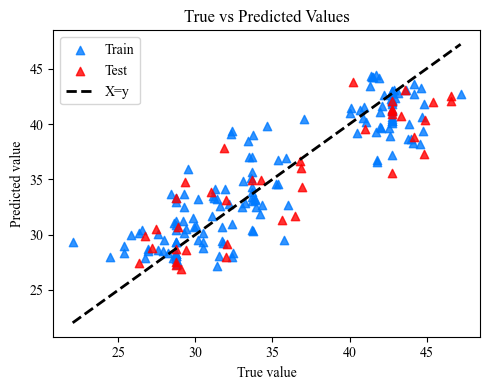

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 35.425548
std_value = 6.379409

y_train_original = y_train * std_value + mean_value
y_train_pred_original = y_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = y_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X=y')

plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs Predicted Values')

plt.legend()

plt.tight_layout()
plt.savefig('Apr_TF_i.jpg', dpi=600)
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TF_scaler.xlsx")

model_features = {
    'RF': ['R', 'a*', 'HUE', 'BplusG', 'NG'],
    'SVR': ['R', 'a*', 'BplusG', 'HUE2', 'NG'],
    'MLP': ['R', 'a*', 'HUE2'],
    'XGBoost': ['RminG', 'R', 'a*', 'BplusG', 'HUE2', 'NG'],
    'LightGBM': ['RminG', 'R', 'a*', 'HUE', 'BplusG', 'HUE2', 'NG'],
}

all_required_features = list(set([f for features in model_features.values() for f in features]))

X = df[all_required_features]
y = df['TF(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

base_models = {
    'RF': {
        'model': RandomForestRegressor(
            n_estimators=10,    
            max_depth=3,        
            random_state=42
        ),
        'use_scaler': False
    },
    'SVR': {
        'model': SVR(
            kernel='linear',    
            C=1,                
        ),
        'use_scaler': False
    },
    'MLP': {
        'model': MLPRegressor(
            hidden_layer_sizes=(10, 5),  
            activation='logistic',   
            alpha=0.01,                   
            max_iter=100,                
            random_state=42
        ),
        'use_scaler': False
    },
    'XGBoost': {
        'model': XGBRegressor(
            n_estimators=50,    
            max_depth=3,        
            learning_rate=0.1,   
            random_state=42
        ),
        'use_scaler': False
    },
    'LightGBM': {
        'model': LGBMRegressor(
            n_estimators=30,    
            max_depth=3,        
            learning_rate=0.1,
            verbose=-1,  
            random_state=42
        ),
        'use_scaler': False
    }
}

def generate_oof_predictions(model, X, y, features, n_splits=5):
    oof_preds = np.zeros(len(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx][features].values
        y_train_fold = y.iloc[train_idx].values.ravel()
        X_val_fold = X.iloc[val_idx][features].values
        
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

optimized_models = {}

for name, model_info in base_models.items():
    print(f"\ntrain {name} model (feature: {model_features[name]})...")
    
    features = model_features[name]
    
    X_train_subset = X_train[features]
    
    model = model_info['model']
    model.fit(X_train_subset, y_train)
    
    optimized_models[name] = {
        'model': model,
        'features': features
    }

meta_features_train = []

for name, model_info in optimized_models.items():
    print(f"being {name} OOF...")
    oof_pred = generate_oof_predictions(
        model_info['model'], 
        X_train, 
        y_train, 
        model_info['features']
    )
    meta_features_train.append(oof_pred.reshape(-1, 1))

meta_features_train = np.hstack(meta_features_train)

meta_model = Lasso(random_state=42)

param_bayes = {
    'alpha': Real(0.05, 10, prior='log-uniform'), 
    'fit_intercept': Categorical([True]), 
}

bayes_search = BayesSearchCV(
    meta_model, 
    param_bayes, 
    n_iter=20, 
    cv=5, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)
bayes_search.fit(meta_features_train, y_train.values.ravel())
best_meta_model = bayes_search.best_estimator_

print(f"\nmodel-param: {bayes_search.best_params_}")
print(f"model-R2: {bayes_search.best_score_:.4f}")

meta_features_test = []

for name, model_info in optimized_models.items():
    model = model_info['model']
    features = model_info['features']
    
    model.fit(X_train[features].values, y_train.values.ravel())
    
    test_pred = model.predict(X_test[features].values).reshape(-1, 1)
    meta_features_test.append(test_pred)

meta_features_test = np.hstack(meta_features_test)

final_pred = best_meta_model.predict(meta_features_test)

test_r2 = r2_score(y_test, final_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
test_mae = mean_absolute_error(y_test, final_pred)

print("\ntest:")
print(f"R2: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

final_train_pred = best_meta_model.predict(meta_features_train)
train_r2 = r2_score(y_train, final_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
train_mae = mean_absolute_error(y_train, final_train_pred)

print("\ntrain:")
print(f"R2: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")


train RF model (feature: ['R', 'a*', 'HUE', 'BplusG', 'NG'])...

train SVR model (feature: ['R', 'a*', 'BplusG', 'HUE2', 'NG'])...

train MLP model (feature: ['R', 'a*', 'HUE2'])...

train XGBoost model (feature: ['RminG', 'R', 'a*', 'BplusG', 'HUE2', 'NG'])...

train LightGBM model (feature: ['RminG', 'R', 'a*', 'HUE', 'BplusG', 'HUE2', 'NG'])...
being RF OOF...
being SVR OOF...
being MLP OOF...
being XGBoost OOF...
being LightGBM OOF...

model-param: OrderedDict({'alpha': 0.05, 'fit_intercept': True})
model-R2: 0.7841

test:
R2: 0.7518
RMSE: 0.5232
MAE: 0.3910

train:
R2: 0.7880
RMSE: 0.4537
MAE: 0.3438


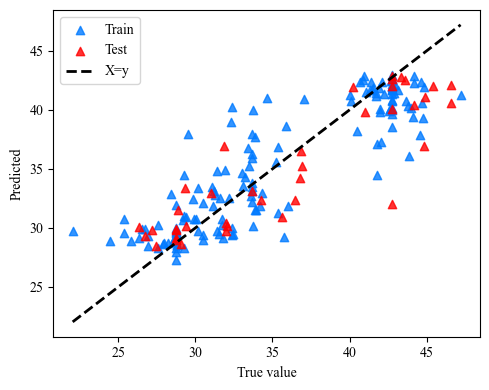

In [36]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 35.425548
std_value = 6.379409

y_train_original = y_train * std_value + mean_value
y_train_pred_original = final_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = final_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X=y')

plt.xlabel('True value')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Apr_TF_j.jpg', dpi=300)
plt.show()

RF: 0.0000
SVR: 0.0000
MLP: 0.0000
XGBoost: 0.3688
LightGBM: 0.3742


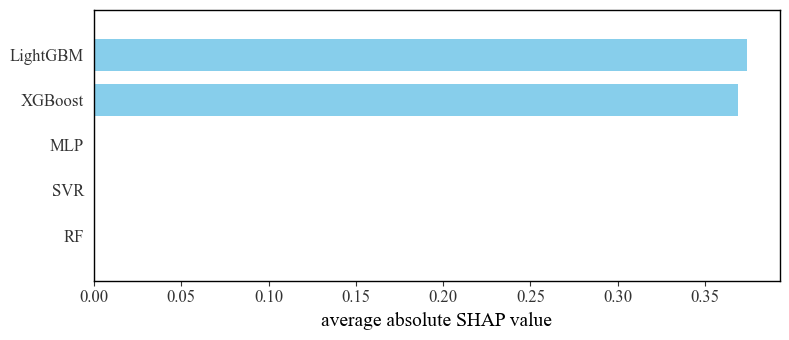

In [37]:
import shap
import matplotlib.pyplot as plt
import numpy as np

base_model_names = ['RF', 'SVR', 'MLP', 'XGBoost', 'LightGBM']

explainer = shap.LinearExplainer(best_meta_model, meta_features_train)
shap_values = explainer.shap_values(meta_features_test)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)


for model_name, shap_val in zip(base_model_names, mean_abs_shap):
    print(f"{model_name}: {shap_val:.4f}")

shap.summary_plot(
    shap_values, 
    meta_features_test, 
    feature_names=base_model_names,
    plot_type="bar",
    color='skyblue',  
    show=False
)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.xlabel("average absolute SHAP value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Apr_TF_k.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

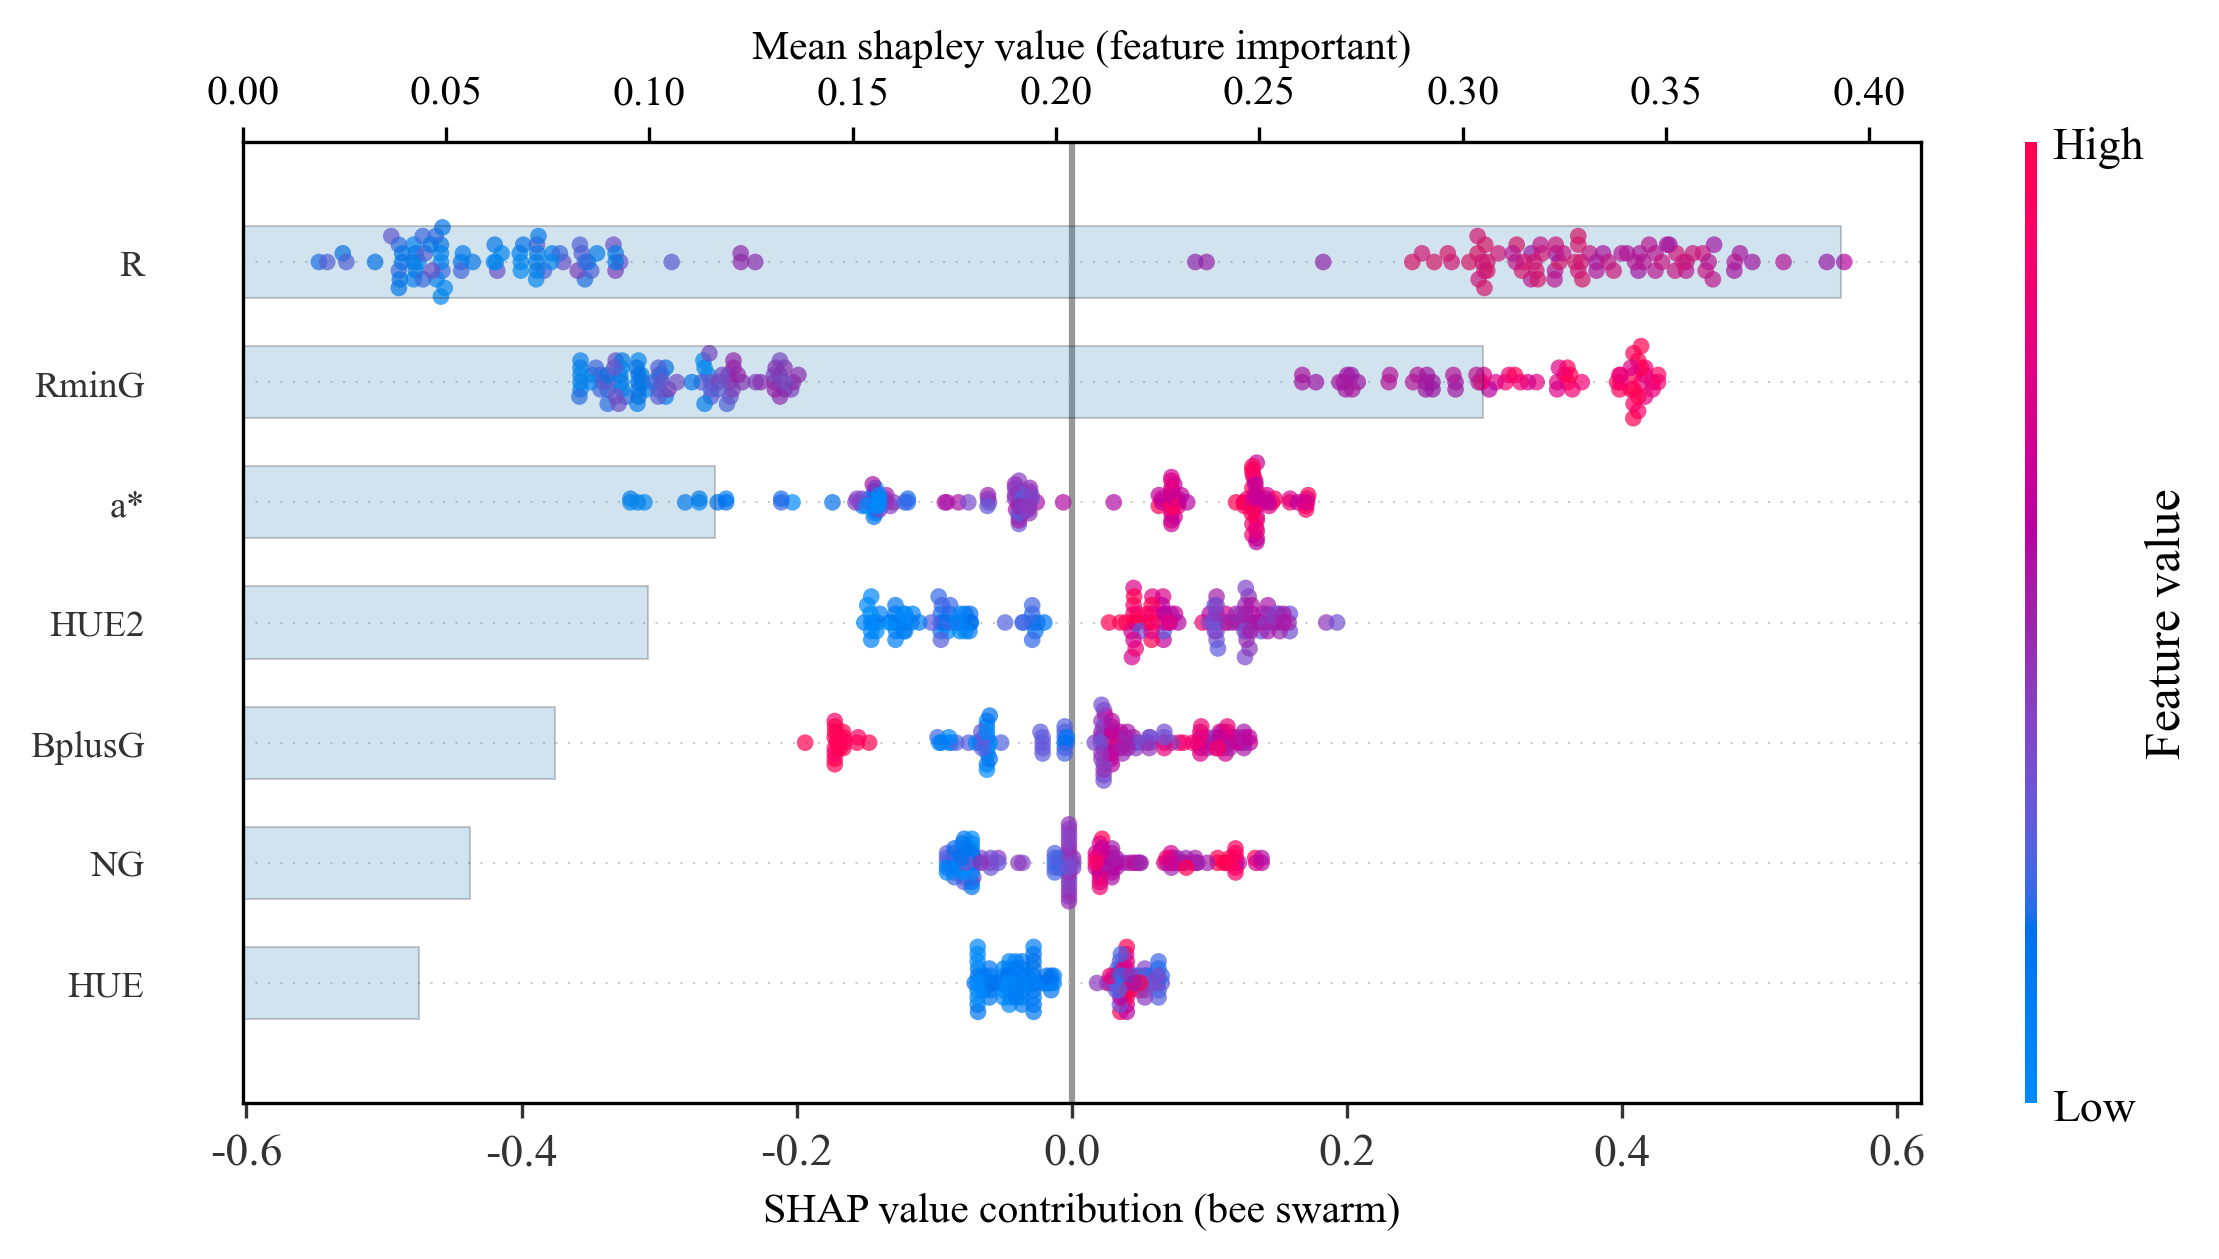

In [38]:
import shap
import matplotlib.pyplot as plt
import numpy as np

rf_model = optimized_models['LightGBM']['model']
rf_features = model_features['LightGBM']

X_train_rf = X_train[rf_features]

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_rf)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_features = [rf_features[i] for i in sorted_indices]

sorted_shap_values = shap_values[:, sorted_indices]
sorted_X_train = X_train_rf[sorted_features]
sorted_mean_abs = mean_abs_shap[sorted_indices]

plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})

shap.summary_plot(
    sorted_shap_values,
    sorted_X_train,
    feature_names=sorted_features,
    plot_type="dot",
    show=False,
    sort=False,
    alpha=0.7
)
ax1 = plt.gca()
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=9)
ax1.set_xlabel('SHAP value contribution (bee swarm)', fontsize=10)

ax2 = ax1.twiny()
ax2.grid(False)
ax2.set_ylim(ax1.get_ylim())

y_pos = np.arange(len(sorted_features))[::-1]
bars = ax2.barh(
    y=y_pos,
    width=sorted_mean_abs,
    height=0.6,
    color='#1f77b4',
    alpha=0.2,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Mean shapley value (feature important)', fontsize=10)
ax2.xaxis.set_label_position('top')
ax2.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Apr_TF_l.png', bbox_inches='tight')
plt.show()

In [39]:
print("\nFeature importance (mean absolute SHAP value):")
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
for i, feature in enumerate(rf_features):
    print(f"{feature}: {mean_abs_shap[i]:.4f}")


Feature importance (mean absolute SHAP value):
RminG: 0.3050
R: 0.3929
a*: 0.1163
HUE: 0.0434
BplusG: 0.0769
HUE2: 0.0997
NG: 0.0558
